# Practice Project - 7 Big Data Mart Sales Problem

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Loading train data

In [2]:
df_tr=pd.read_csv("bigdatamart_Train.csv")
df_tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Loading test data

In [3]:
df_ts=pd.read_csv("bigdatamart_Test.csv")
df_ts

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Understanding the Datasets:

There are 12 columns in the dataset namely:
    
    Item_Identifier: This column shows the Identifier number of item.
    
    Item_Weight:This column shows the weight of item.
    
    Item_Fat_Content:This column shows the fat content of item.
    
    
    Item_Visibility:This column shows the visibility content of item.
        
    Item_Type:This column shows the Identifier number of item.
        
    Item_MRP: This column shows the price of item.
        
    Outlet_Identifier: This column shows the outlet Identifier number of item.
    
    Outlet_Establishment_Year:This column shows outlet establishment year of item.
        
    Outlet_Size:This column shows the outlet size of item.
        
    Outlet_Location_Type:This column shows the outlet location type of item.
        
    Outlet_Type:This column shows the outlet type of item.
    
    Item_Outlet_Sales:This column shows the outlet sales of item.

In [4]:
df_tr.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df_ts.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Checking the null values

In [6]:
df_tr.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_ts.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Checking the percentage of null values in train data

In [8]:
percent_missing = df_tr.isnull().sum() * 100 / len(df_tr)
percent_missing

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

# Checking the percentage of null values in test data

In [9]:
percent_missing = df_ts.isnull().sum() * 100 / len(df_ts)
percent_missing

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

Handling the Nan values and replacing it with mean of the column. As the column is countinous in nature

# Replacing the train values with mean

In [10]:
df_tr['Item_Weight']=df_tr['Item_Weight'].fillna(np.mean(df_tr['Item_Weight']))

# Replacing the test values with mean

In [11]:
df_ts['Item_Weight']=df_ts['Item_Weight'].fillna(np.mean(df_ts['Item_Weight']))

Outlet_Size is oblect column so first Encoding the data and then replce the nan values with mean

In [12]:
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
df_tr['Outlet_Size']=lencoder.fit_transform(df_tr['Outlet_Size'])

In [13]:
lencoder=LabelEncoder()
df_ts['Outlet_Size']=lencoder.fit_transform(df_ts['Outlet_Size'])

Now replacing with mean values

In [14]:
df_tr['Outlet_Size']=df_tr['Outlet_Size'].fillna(np.mean(df_tr['Outlet_Size']))

In [15]:
df_ts['Outlet_Size']=df_ts['Outlet_Size'].fillna(np.mean(df_ts['Outlet_Size']))

In [16]:
df_tr.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_ts.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Data Visualization on train data

In [18]:
df_tr.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

for Categorical Features we will use count plot

Item_Identifier               

Item_Fat_Content             

Item_Type                     

Outlet_Identifier  

Outlet_Establishment_Year	

Outlet_Size   

Outlet_Location_Type  

Outlet_Type         

Item_Outlet_Sales 

FDG33    10
FDW13    10
NCQ06     9
NCI54     9
FDG09     9
         ..
DRF48     1
FDN52     1
FDT35     1
FDK57     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64


<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

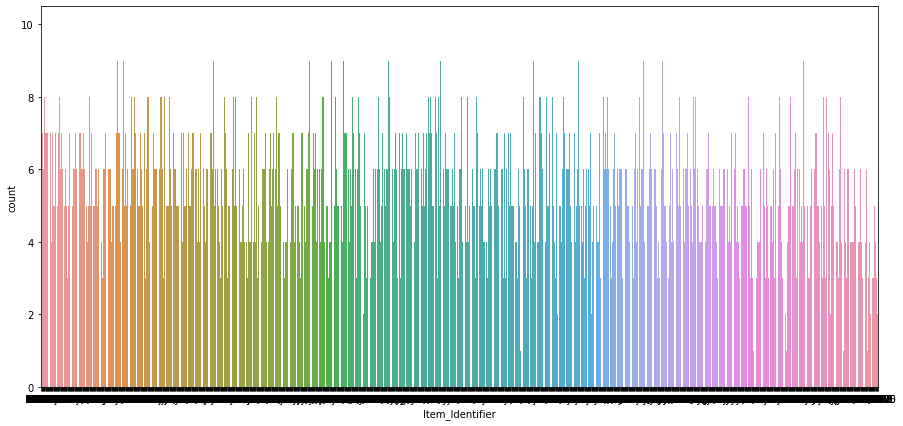

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=df_tr['Item_Identifier'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df_tr['Item_Identifier'])

from the above observation it is observed that Item_Identifier has spread in wide range and it has classes from 1 to 10.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

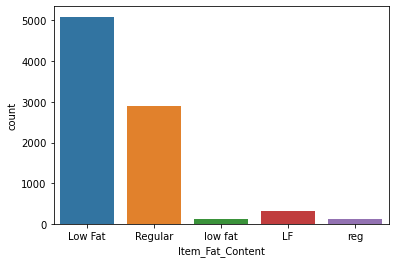

In [20]:
ax=df_tr['Item_Fat_Content'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_tr['Item_Fat_Content'])

from the above obserations the total number of Item_Fat_Content are more in number for Low fat and midrange for Regular

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

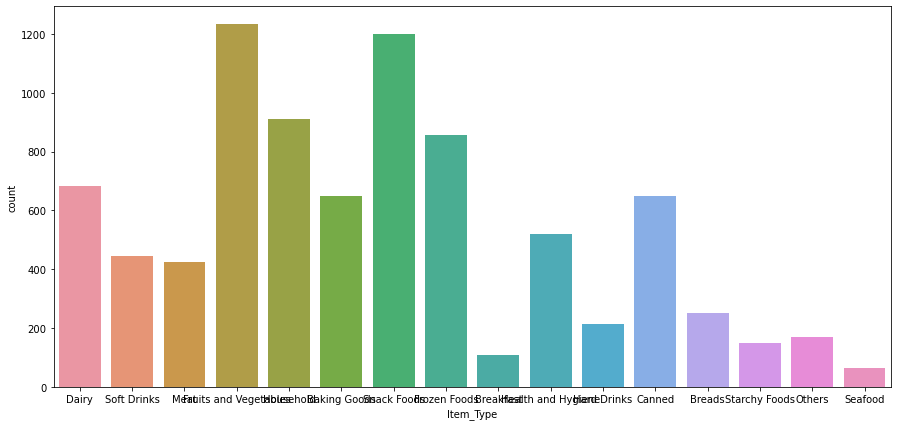

In [21]:
ax=df_tr['Item_Type'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df_tr['Item_Type'])

from the above observation it is observed that these are the types of food item
Fruits and Vegetables    
Snack Foods              
Household                 
Frozen Foods              
Dairy                     
Canned                    
Baking Goods              
Health and Hygiene        
Soft Drinks               
Meat                      
Breads                    
Hard Drinks               
Others                    
Starchy Foods             
Breakfast                 
Seafood  

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

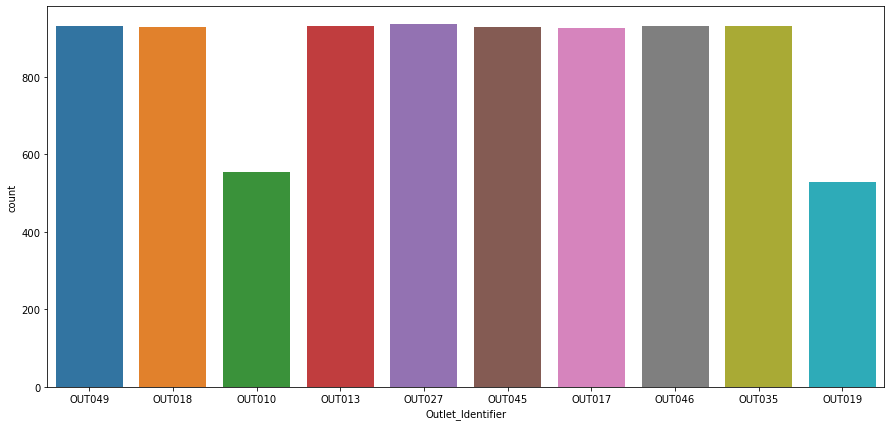

In [22]:
ax=df_tr['Outlet_Identifier'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df_tr['Outlet_Identifier'])

from the above observation it is observed that different types of outlet number.

1    2793
3    2410
2    2388
0     932
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

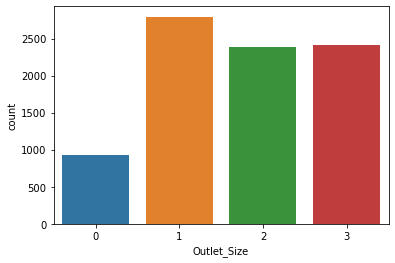

In [23]:
ax=df_tr['Outlet_Size'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_tr['Outlet_Size'])

from the above observation it is observed that 4 different types of outlet size.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

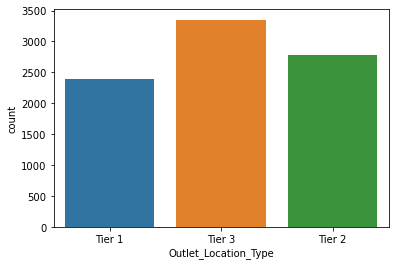

In [24]:
ax=df_tr['Outlet_Location_Type'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_tr['Outlet_Location_Type'])

from the above observation it is observed that Outlet_Location_Type has 3 types of class.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

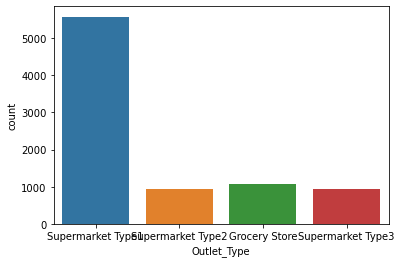

In [25]:
ax=df_tr['Outlet_Type'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_tr['Outlet_Type'])

from the above observation it observed that outlet types are 4 of types.

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

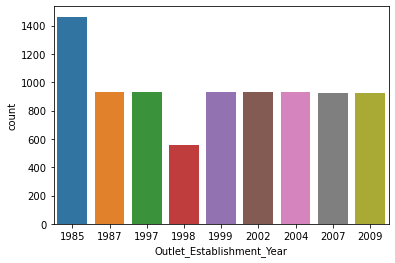

In [26]:
ax=df_tr['Outlet_Establishment_Year'].value_counts()
print(ax)
sns.countplot(df_tr['Outlet_Establishment_Year'])

The above observation shows that in which year the product is established.

1    2793
3    2410
2    2388
0     932
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

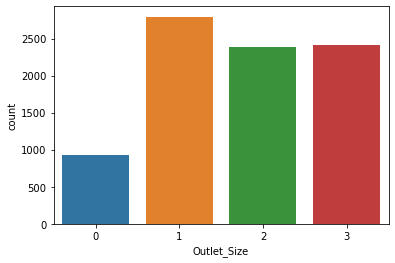

In [27]:
ax=df_tr['Outlet_Size'].value_counts()
print(ax)
sns.countplot(df_tr['Outlet_Size'])

from the above observation it is shown that outlet size ias varied from class 0 to 3

In [28]:
ax=df_tr['Item_Outlet_Sales'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
#sns.countplot(df_tr['Item_Outlet_Sales'])

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64


This column has large number of data so it is not able to plot this plot.

In [29]:
df_tr.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Encoding  of train data

In [30]:
df_tr['Item_Identifier']=lencoder.fit_transform(df_tr['Item_Identifier'])
df_tr['Item_Fat_Content']=lencoder.fit_transform(df_tr['Item_Fat_Content'])
df_tr['Item_Type']=lencoder.fit_transform(df_tr['Item_Type'])
df_tr['Outlet_Identifier']=lencoder.fit_transform(df_tr['Outlet_Identifier'])
df_tr['Outlet_Location_Type']=lencoder.fit_transform(df_tr['Outlet_Location_Type'])
df_tr['Outlet_Type']=lencoder.fit_transform(df_tr['Outlet_Type'])

In [31]:
df_tr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


# Encoding of test data

In [32]:
df_ts['Item_Identifier']=lencoder.fit_transform(df_ts['Item_Identifier'])
df_ts['Item_Fat_Content']=lencoder.fit_transform(df_ts['Item_Fat_Content'])
df_ts['Item_Type']=lencoder.fit_transform(df_ts['Item_Type'])
df_ts['Outlet_Identifier']=lencoder.fit_transform(df_ts['Outlet_Identifier'])
df_ts['Outlet_Location_Type']=lencoder.fit_transform(df_ts['Outlet_Location_Type'])
df_ts['Outlet_Type']=lencoder.fit_transform(df_ts['Outlet_Type'])

In [33]:
df_ts

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,3,1,1


# Visualization on train data

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

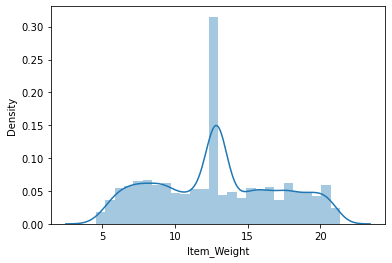

In [34]:
sns.distplot(df_tr['Item_Weight'],kde=True)

from the above observation it is observed that data is spread from 4 to 23

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

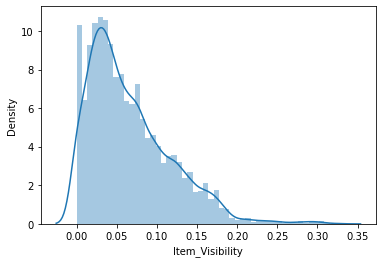

In [35]:
sns.distplot(df_tr['Item_Visibility'],kde=True)

from the above observation it is observed that data is spread from 0 to 0.35 and it not normalized.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

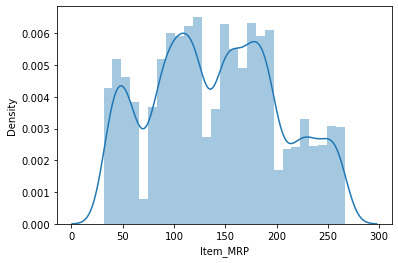

In [36]:
sns.distplot(df_tr['Item_MRP'],kde=True)

from the above observation it is observed that data is spread from 27 to 270 and it is not normalized.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

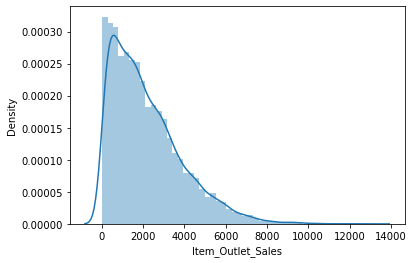

In [37]:
sns.distplot(df_tr['Item_Outlet_Sales'],kde=True)

from the above observation it is observed that data is spread from 0 to 14000 and it is not normalized.

# Scatter plot on train dataset

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Weight'>

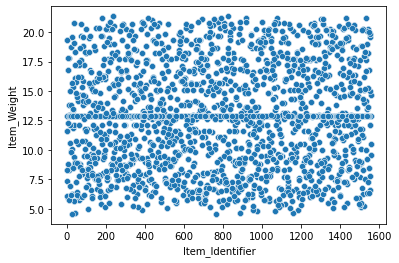

In [38]:
sns.scatterplot(x='Item_Identifier',y='Item_Weight',data=df_tr)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

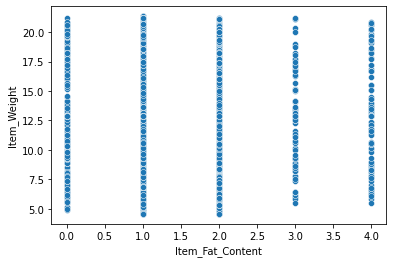

In [39]:
sns.scatterplot(x='Item_Fat_Content',y='Item_Weight',data=df_tr)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

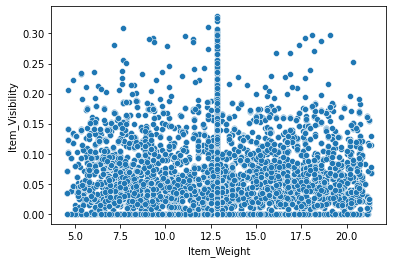

In [40]:
sns.scatterplot(y='Item_Visibility',x='Item_Weight',data=df_tr)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

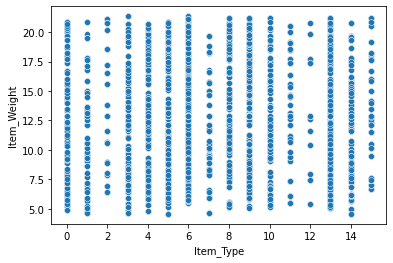

In [41]:
sns.scatterplot(x='Item_Type',y='Item_Weight',data=df_tr)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Weight'>

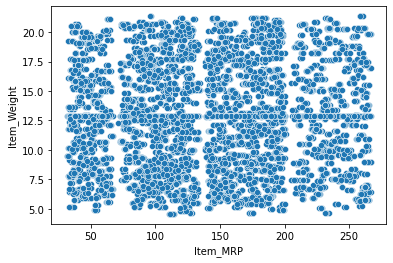

In [42]:
sns.scatterplot(x='Item_MRP',y='Item_Weight',data=df_tr)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Identifier'>

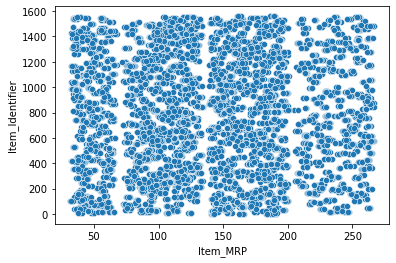

In [43]:
sns.scatterplot(x='Item_MRP',y='Item_Identifier',data=df_tr)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Identifier'>

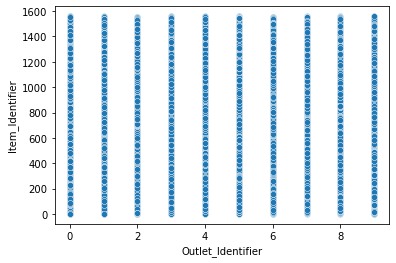

In [44]:
sns.scatterplot(x='Outlet_Identifier',y='Item_Identifier',data=df_tr)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Identifier'>

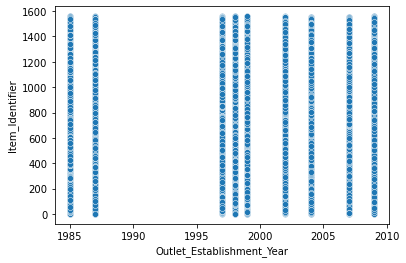

In [45]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Identifier',data=df_tr)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Identifier'>

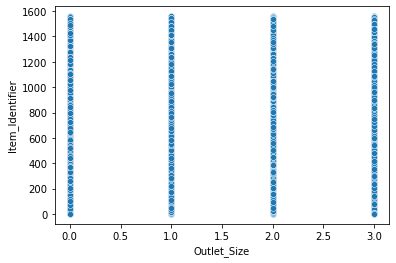

In [46]:
sns.scatterplot(x='Outlet_Size',y='Item_Identifier',data=df_tr)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Identifier'>

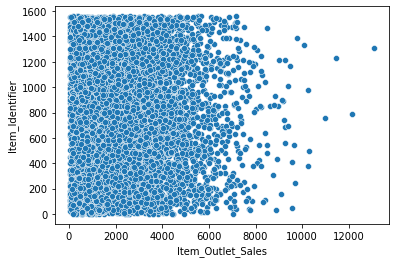

In [47]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Identifier',data=df_tr)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Outlet_Location_Type'>

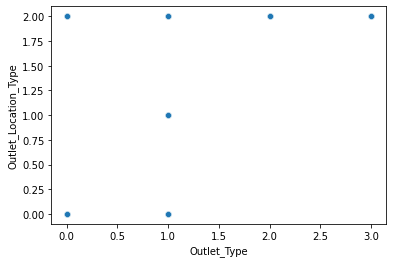

In [48]:
sns.scatterplot(y='Outlet_Location_Type',x='Outlet_Type',data=df_tr)

# Observation:
From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

# Data Visualization on test data

for Categorical Features we will use count plot

Item_Identifier

Item_Fat_Content

Item_Type

Outlet_Identifier

Outlet_Establishment_Year

Outlet_Size

Outlet_Location_Type

Outlet_Type



680     8
734     8
45      8
1470    8
1064    8
       ..
1372    1
1368    1
412     1
984     1
1053    1
Name: Item_Identifier, Length: 1543, dtype: int64


<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

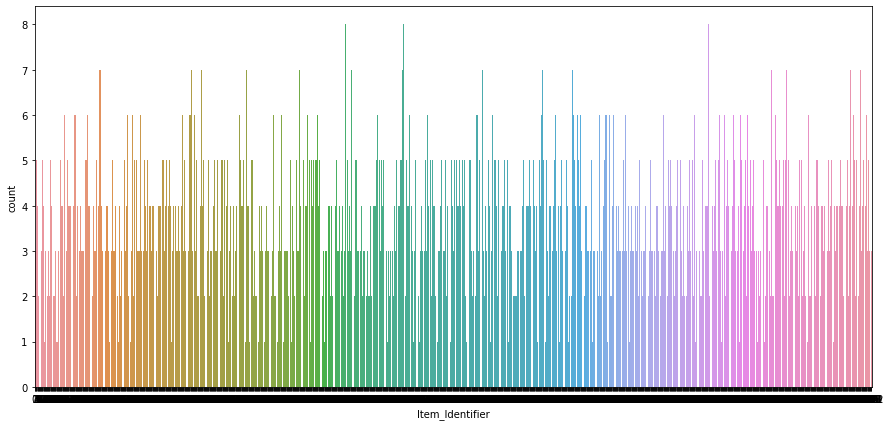

In [49]:
ax=df_ts['Item_Identifier'].value_counts()
print(ax)
plt.figure(figsize=(15,7))
sns.countplot(df_ts['Item_Identifier'])

from the above observation it is observed that Item_Identifier has spread in wide range and it has classes from 1 to 8.

1    3396
2    1935
0     206
4      78
3      66
Name: Item_Fat_Content, dtype: int64


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

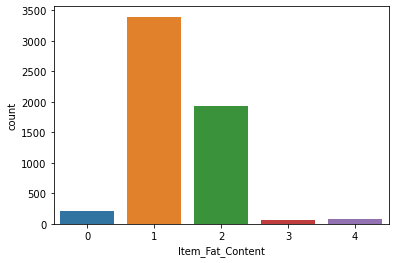

In [50]:
ax=df_ts['Item_Fat_Content'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Item_Fat_Content'])

from the above plot it is observed that in test dataset fat content have classees from 0 to 4

13    789
6     781
9     638
5     570
4     454
0     438
3     435
8     338
10    311
14    281
1     165
7     148
15    121
11    111
2      76
12     25
Name: Item_Type, dtype: int64


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

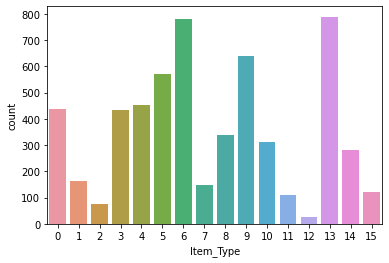

In [51]:
ax=df_ts['Item_Type'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Item_Type'])

from the above plot it is observed that in test dataset item type have classees from 0 to 15

5    624
1    621
6    620
9    620
8    620
7    619
3    618
2    617
0    370
4    352
Name: Outlet_Identifier, dtype: int64


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

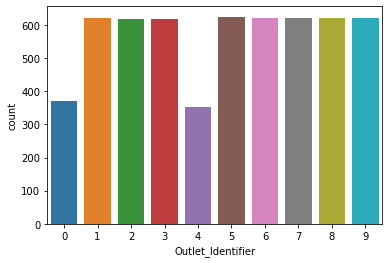

In [52]:
ax=df_ts['Outlet_Identifier'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Outlet_Identifier'])

from the above plot it is observed that in test dataset item type have classees from 0 to 9

1985    976
1987    621
1999    620
1997    620
2004    620
2002    619
2009    618
2007    617
1998    370
Name: Outlet_Establishment_Year, dtype: int64


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

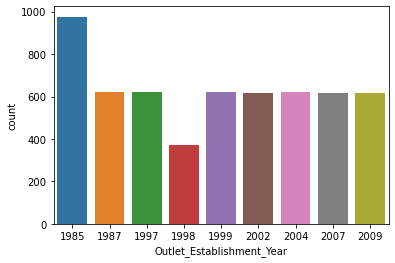

In [53]:
ax=df_ts['Outlet_Establishment_Year'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Outlet_Establishment_Year'])

The above observation shows that in which year the product is established.

1    1862
3    1606
2    1592
0     621
Name: Outlet_Size, dtype: int64


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

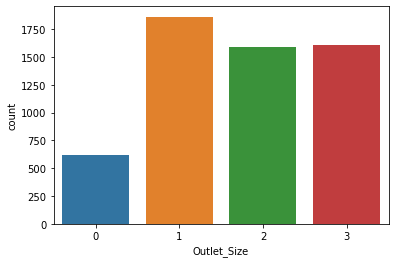

In [54]:
ax=df_ts['Outlet_Size'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Outlet_Size'])

from the above observation it is shown that outlet size ias varied from class 0 to 3

2    2233
1    1856
0    1592
Name: Outlet_Location_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

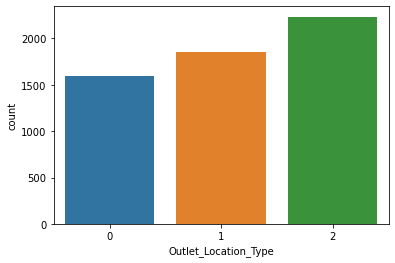

In [55]:
ax=df_ts['Outlet_Location_Type'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Outlet_Location_Type'])

from the above plot it is observed that Outlet_Location_Type has 3 types 0,1,2.

1    3717
0     722
3     624
2     618
Name: Outlet_Type, dtype: int64


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

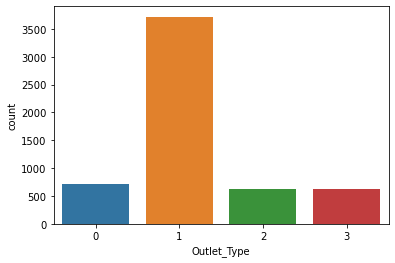

In [56]:
ax=df_ts['Outlet_Type'].value_counts()
print(ax)
#plt.figure(figsize=(15,7))
sns.countplot(df_ts['Outlet_Type'])

from the above plot it is observed that Outlet Type has 4 types 0,1,2,3

<AxesSubplot:xlabel='Item_Identifier', ylabel='Density'>

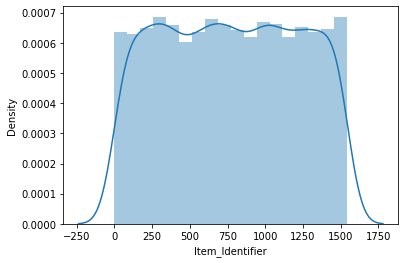

In [57]:
sns.distplot(df_ts['Item_Identifier'],kde=True)

from the above observation it is observed that data is spread from 0 to 1550 and it is not normalized.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

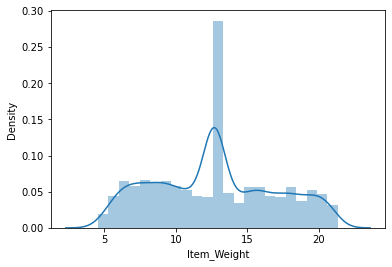

In [58]:
sns.distplot(df_ts['Item_Weight'],kde=True)

from the above observation it is observed that data is spread from 4 to 23 and it is not normalized.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

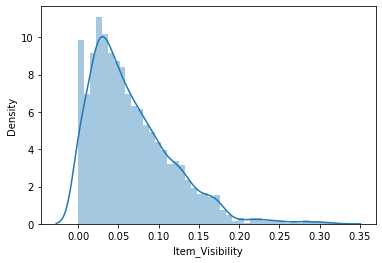

In [59]:
sns.distplot(df_ts['Item_Visibility'],kde=True)

from the above observation it is observed that data is spread from 0 to 0.35 and it is not normalized.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

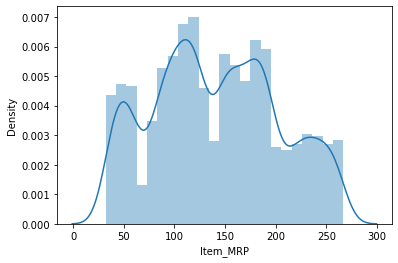

In [60]:
sns.distplot(df_ts['Item_MRP'],kde=True)

from the above observation it is observed that data is spread from 28 to 270 and it is not normalized.

# Scatterplot on Test data

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Weight'>

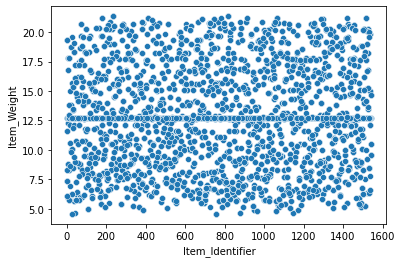

In [61]:
sns.scatterplot(x='Item_Identifier',y='Item_Weight',data=df_ts)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Weight'>

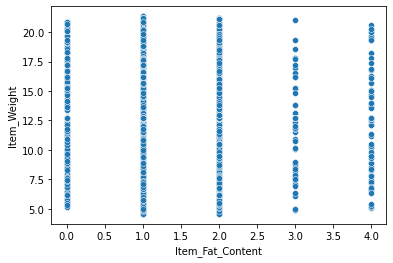

In [62]:
sns.scatterplot(x='Item_Fat_Content',y='Item_Weight',data=df_ts)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

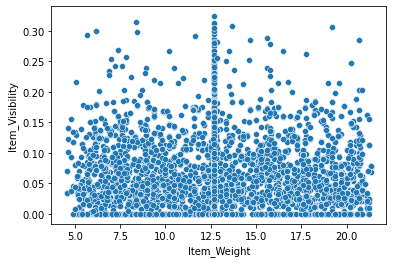

In [63]:
sns.scatterplot(y='Item_Visibility',x='Item_Weight',data=df_ts)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Weight'>

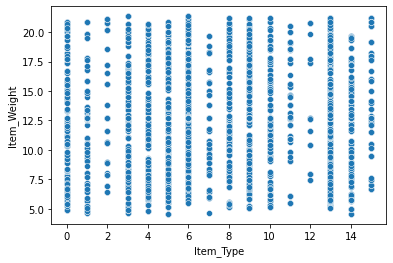

In [64]:
sns.scatterplot(x='Item_Type',y='Item_Weight',data=df_ts)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Weight'>

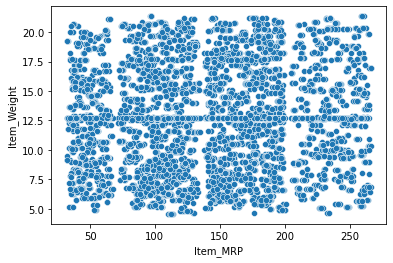

In [65]:
sns.scatterplot(x='Item_MRP',y='Item_Weight',data=df_ts)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Identifier'>

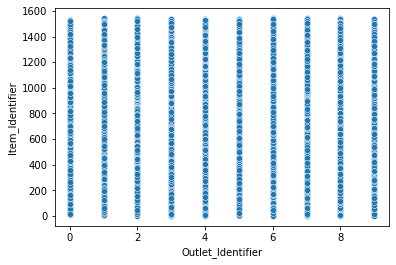

In [66]:
sns.scatterplot(x='Outlet_Identifier',y='Item_Identifier',data=df_ts)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Identifier'>

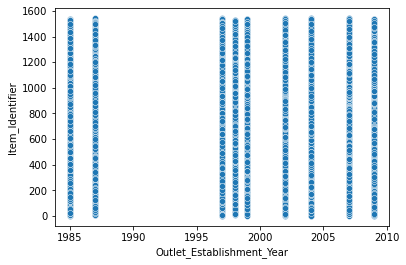

In [67]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Identifier',data=df_ts)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Identifier'>

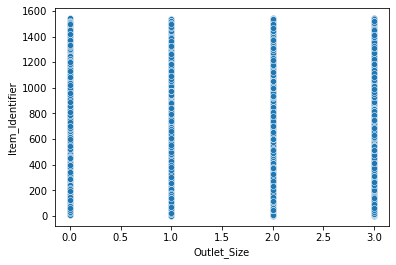

In [68]:
sns.scatterplot(x='Outlet_Size',y='Item_Identifier',data=df_ts)

# Observation:
From the above observation, it is clear that the data are not normalised and we should proceed with the data cleaning method.

# Describe the train data 

In [69]:
df_tr.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,1.369354,0.066132,7.226681,140.992782,4.722281,1997.831867,1.736360,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.644810,0.051598,4.209990,62.275067,2.837201,8.371760,0.989181,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,1.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,1.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,2.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,3.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,3.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

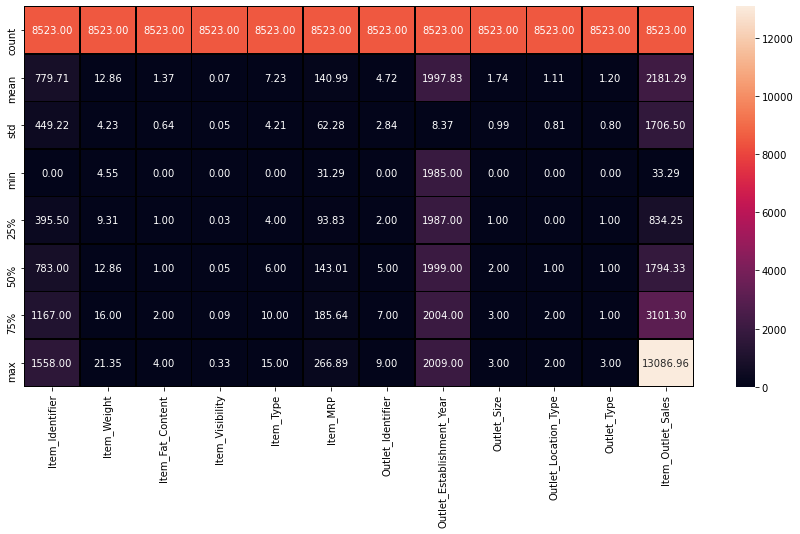

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_tr.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

# Describe the test data

In [71]:
df_ts.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,1.368773,0.065684,7.233410,141.023273,4.722760,1997.828903,1.736314,1.112832,1.201373
std,445.525926,4.245189,0.641085,0.051252,4.219057,61.809091,2.837201,8.372256,0.989113,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,1.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,1.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1160.000000,15.850000,2.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,3.000000,2.000000,1.000000
max,1542.000000,21.350000,4.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,3.000000,2.000000,3.000000


<AxesSubplot:>

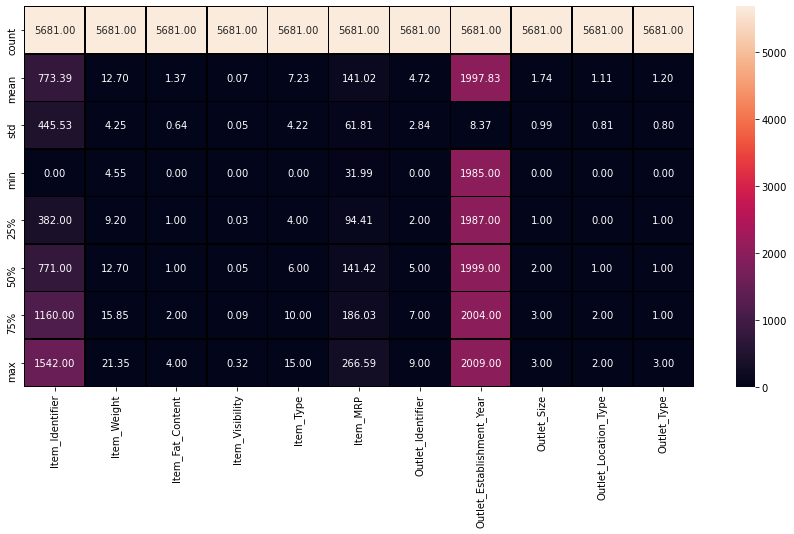

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df_ts.describe(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

# Correlation of train data

In [73]:
df_tr.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.098114,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.000855,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.017331,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.015096,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.098114,-0.017331,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.000189,-0.004795,-0.004102,-0.004214,0.009800
Item_Visibility,-0.025482,-0.012049,0.034042,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.087796,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.115958,-0.035249,1.000000,0.032651,0.001656,0.004970,0.000827,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.005020,-0.002473,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.079035,0.053224,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,-0.000189,-0.074834,0.004970,0.005020,0.079035,1.000000,0.470343,-0.089216,-0.122304,-0.049135
Outlet_Size,0.000855,-0.015096,-0.004795,0.087796,0.000827,-0.002473,0.053224,0.470343,1.000000,-0.290216,-0.432062,-0.172477
Outlet_Location_Type,0.003656,0.004088,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.290216,1.000000,0.467219,0.089367


<Figure size 432x288 with 0 Axes>

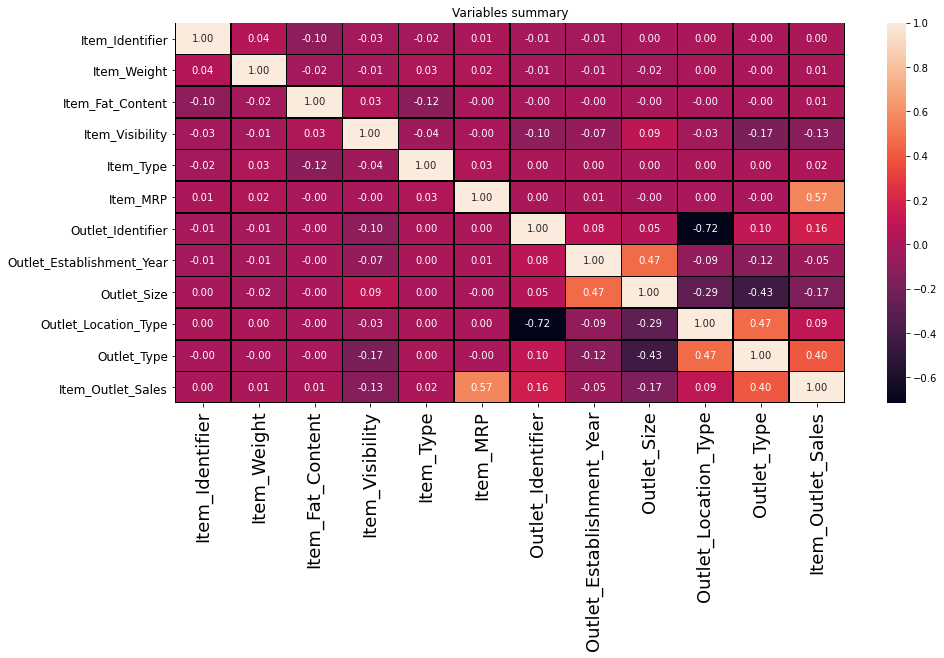

In [74]:
plt.figure()
plt.figure(figsize=(15,7))
sns.heatmap(df_tr.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Correlation of test data

In [75]:
df_ts.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,0.051221,-0.093344,-0.063856,-0.003236,0.007537,0.010162,0.011728,0.005649,-0.011657,-0.009553
Item_Weight,0.051221,1.000000,-0.042625,-0.016380,0.029657,0.045257,0.020081,0.013548,0.018669,-0.011356,0.005080
Item_Fat_Content,-0.093344,-0.042625,1.000000,0.033591,-0.128945,-0.014283,-0.000792,-0.010088,-0.004325,-0.000130,0.000387
Item_Visibility,-0.063856,-0.016380,0.033591,1.000000,-0.036237,-0.014013,-0.114857,-0.097040,0.091566,-0.001146,-0.154042
Item_Type,-0.003236,0.029657,-0.128945,-0.036237,1.000000,0.060990,0.000333,0.000204,-0.005120,0.000584,0.006179
Item_MRP,0.007537,0.045257,-0.014283,-0.014013,0.060990,1.000000,-0.006412,-0.007233,0.001641,0.001754,0.003326
Outlet_Identifier,0.010162,0.020081,-0.000792,-0.114857,0.000333,-0.006412,1.000000,0.079065,0.053055,-0.716113,0.099937
Outlet_Establishment_Year,0.011728,0.013548,-0.010088,-0.097040,0.000204,-0.007233,0.079065,1.000000,0.470456,-0.089496,-0.122841
Outlet_Size,0.005649,0.018669,-0.004325,0.091566,-0.005120,0.001641,0.053055,0.470456,1.000000,-0.290147,-0.432138
Outlet_Location_Type,-0.011657,-0.011356,-0.000130,-0.001146,0.000584,0.001754,-0.716113,-0.089496,-0.290147,1.000000,0.467299


<Figure size 432x288 with 0 Axes>

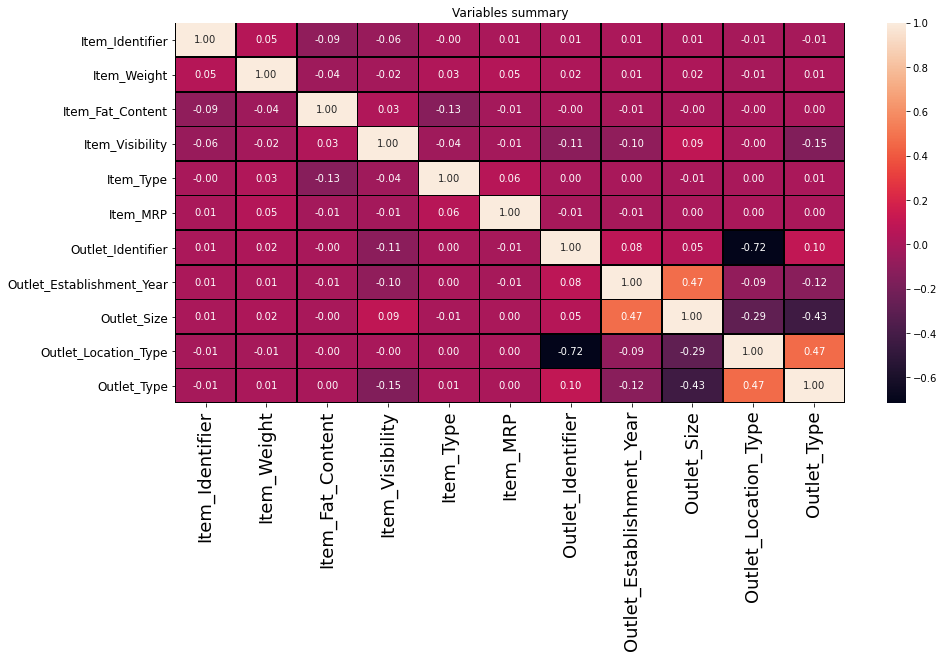

In [76]:
plt.figure()
plt.figure(figsize=(15,7))
sns.heatmap(df_ts.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Skewness of train data

In [77]:
df_tr.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.131895
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

From the above observation the columns falls under high skewness:
    
Item_Fat_Content = 0.994824
Item_Visibility  = 1.167091
Outlet_Type      = 0.927438
Item_Outlet_Sales= 1.177531

but Item_Fat_Content and Outlet_Type are categorical data hence we cannot remove skewness from it.
We need to transform those columns which has skewness

# Skewness of test data

In [78]:
df_ts.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.131755
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

From the above observation the columns falls under high skewness:
    
Item_Fat_Content = 0.999629
Item_Visibility  = 1.238312
Outlet_Type      = 0.927446


but Item_Fat_Content and Outlet_Type are categorical data hence we cannot remove skewness from it.
We need to transform those columns which has skewness

# Data Transformation on train data:

# Outliers Check:

<AxesSubplot:>

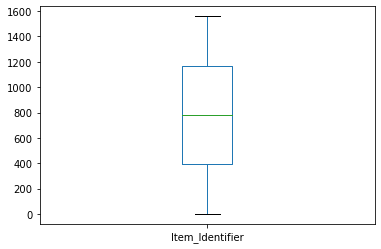

In [79]:
df_tr['Item_Identifier'].plot.box()

<AxesSubplot:>

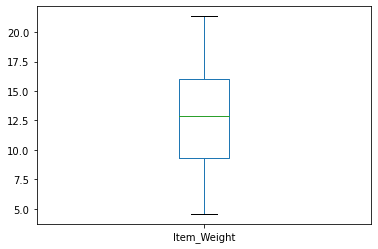

In [80]:
df_tr['Item_Weight'].plot.box()

<AxesSubplot:>

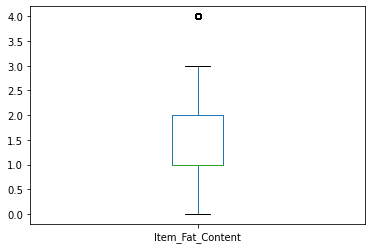

In [81]:
df_tr['Item_Fat_Content'].plot.box()

<AxesSubplot:>

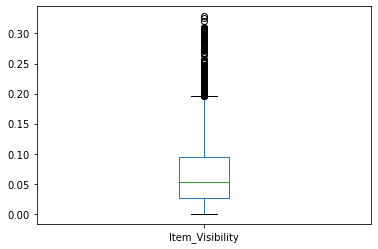

In [82]:
df_tr['Item_Visibility'].plot.box()

<AxesSubplot:>

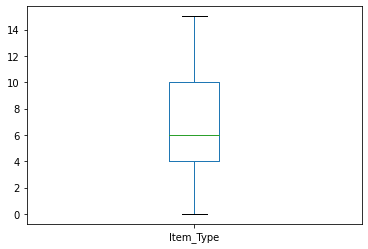

In [83]:
df_tr['Item_Type'].plot.box()

<AxesSubplot:>

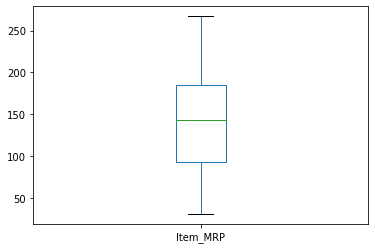

In [84]:
df_tr['Item_MRP'].plot.box()

<AxesSubplot:>

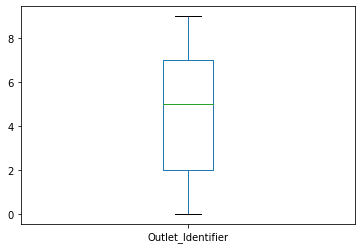

In [85]:
df_tr['Outlet_Identifier'].plot.box()

<AxesSubplot:>

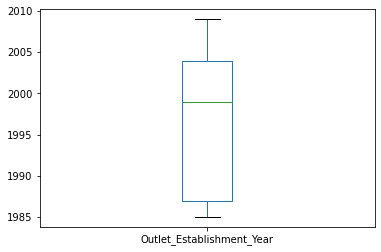

In [86]:
df_tr['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

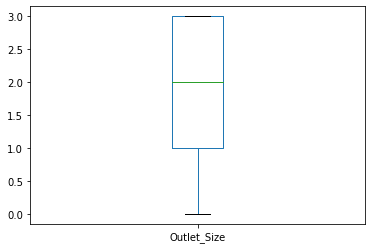

In [87]:
df_tr['Outlet_Size'].plot.box()

<AxesSubplot:>

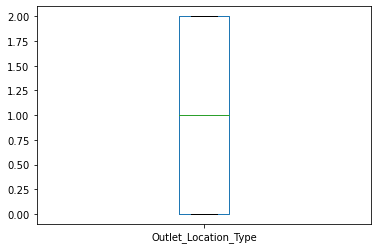

In [88]:
df_tr['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

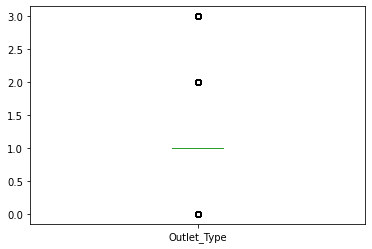

In [89]:
df_tr['Outlet_Type'].plot.box()

<AxesSubplot:>

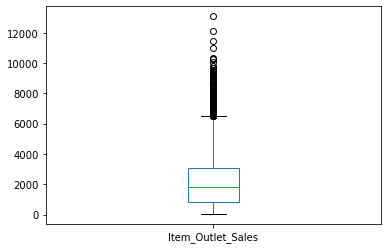

In [90]:
df_tr['Item_Outlet_Sales'].plot.box()

# Check the percentage of train data falls under outliers:

In [91]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_tr))
threshold=3
np.where(z>3)

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
         333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
         615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
         991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
        1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
        1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
        1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
        2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
        2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
        2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
        3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
        3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
        3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
        3884, 3993, 4006, 4019, 4083, 

In [92]:
df_tr_new=df_tr[(z<3).all(axis=1)]
df_tr_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [93]:
df_tr.shape

(8523, 12)

# Percentage loss of train data while removing outliers

In [94]:
percentage_loss=((8523-8222)/8523)*100
print(percentage_loss)

3.5316203214830457


Since thepercentage of outliers are less than 5 percent.

We can proceed with the outliers removable.

Sometimes z-score unable to remove outliers. So we prefer IQR here over z-score.

In [95]:
Q1 = df_tr.quantile(0.25)
Q3 = df_tr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Item_Identifier               771.500000
Item_Weight                     6.690000
Item_Fat_Content                1.000000
Item_Visibility                 0.067596
Item_Type                       6.000000
Item_MRP                       91.817200
Outlet_Identifier               5.000000
Outlet_Establishment_Year      17.000000
Outlet_Size                     2.000000
Outlet_Location_Type            2.000000
Outlet_Type                     0.000000
Item_Outlet_Sales            2267.049000
dtype: float64


In [96]:
df_tr_new1= df_tr[~((df_tr < (Q1 - 1.5 * IQR)) |(df_tr > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_tr_new1.shape)

(5419, 12)


In [97]:
percentage_loss=((8523-5419)/8523)*100
print(percentage_loss)

36.4191012554265


The percentage loss in the IQR is more than that of z-score, so means this dataset has more outliers are present.

In [98]:
x=df_tr_new1.iloc[:,:-1]
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1
6,696,13.650,2,0.012741,13,57.6588,1,1987,0,2,1
8,440,16.200,2,0.016687,5,96.9726,7,2002,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8514,145,15.000,2,0.054489,3,57.5904,7,2002,3,1,1
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1


In [99]:
y=df_tr_new1.iloc[:,-1]
y

0       3735.1380
2       2097.2700
4        994.7052
6        343.5528
8       1076.5986
          ...    
8514     468.7232
8518    2778.3834
8519     549.2850
8520    1193.1136
8522     765.6700
Name: Item_Outlet_Sales, Length: 5419, dtype: float64

# Removing skewness of train dataset by transforming data.

In [100]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Data Transformation on test data:

<AxesSubplot:>

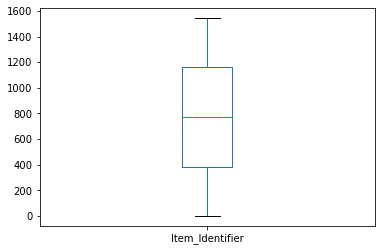

In [101]:
df_ts['Item_Identifier'].plot.box()

<AxesSubplot:>

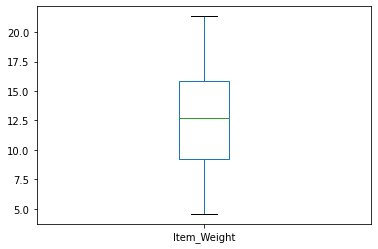

In [102]:
df_ts['Item_Weight'].plot.box()

<AxesSubplot:>

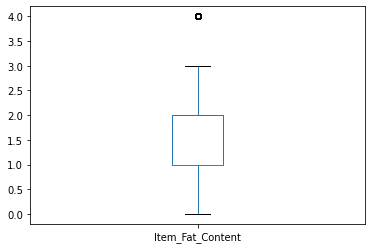

In [103]:
df_ts['Item_Fat_Content'].plot.box()

<AxesSubplot:>

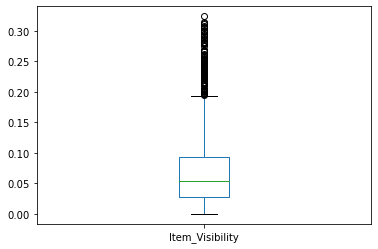

In [104]:
df_ts['Item_Visibility'].plot.box()

<AxesSubplot:>

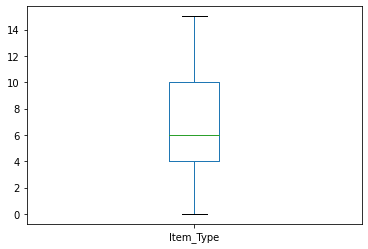

In [105]:
df_ts['Item_Type'].plot.box()

<AxesSubplot:>

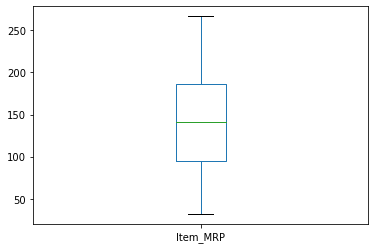

In [106]:
df_ts['Item_MRP'].plot.box()

<AxesSubplot:>

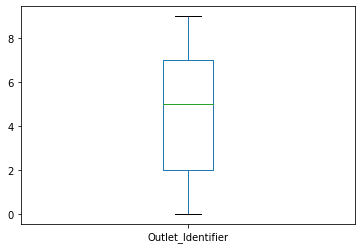

In [107]:
df_ts['Outlet_Identifier'].plot.box()

<AxesSubplot:>

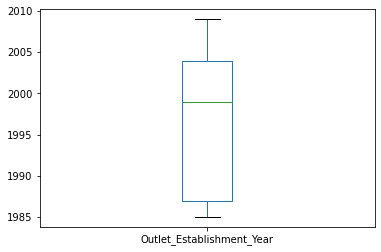

In [108]:
df_ts['Outlet_Establishment_Year'].plot.box()

<AxesSubplot:>

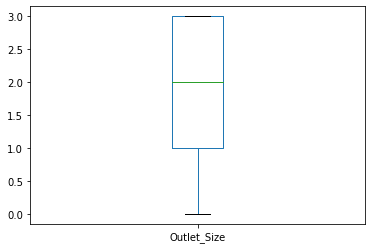

In [109]:
df_ts['Outlet_Size'].plot.box()

<AxesSubplot:>

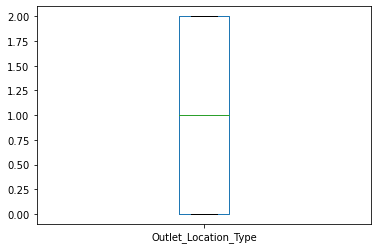

In [110]:
df_ts['Outlet_Location_Type'].plot.box()

<AxesSubplot:>

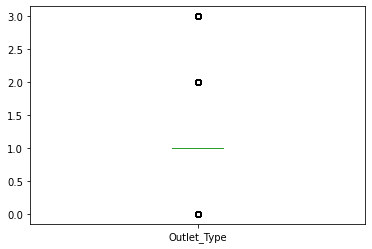

In [111]:
df_ts['Outlet_Type'].plot.box()

# Check the percentage of train data falls under outliers:

In [112]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df_ts))
threshold=3
np.where(z>3)

(array([   1,   46,   76,   78,   89,  103,  138,  242,  333,  369,  385,
         474,  499,  543,  595,  637,  739,  783,  797,  815,  858,  871,
         985,  996, 1025, 1037, 1046, 1105, 1143, 1191, 1256, 1256, 1270,
        1284, 1314, 1321, 1411, 1422, 1437, 1516, 1539, 1547, 1577, 1616,
        1710, 1757, 1780, 1812, 1823, 1853, 1857, 1915, 1919, 1927, 2019,
        2070, 2167, 2179, 2230, 2271, 2275, 2365, 2365, 2380, 2393, 2504,
        2516, 2561, 2595, 2605, 2609, 2625, 2628, 2677, 2779, 2798, 2836,
        2843, 2866, 2915, 2926, 3039, 3077, 3097, 3267, 3294, 3313, 3316,
        3346, 3357, 3362, 3378, 3461, 3502, 3565, 3622, 3638, 3679, 3744,
        3778, 3783, 3950, 3970, 4021, 4052, 4133, 4146, 4147, 4148, 4159,
        4208, 4232, 4255, 4328, 4330, 4334, 4340, 4352, 4365, 4421, 4478,
        4542, 4575, 4616, 4616, 4689, 4692, 4726, 4801, 4804, 4845, 4846,
        4870, 4919, 4921, 4941, 4965, 4970, 4976, 4999, 5121, 5132, 5154,
        5157, 5168, 5277, 5290, 5323, 

In [113]:
df_ts_new=df_ts[(z<3).all(axis=1)]
df_ts_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
5,461,9.800000,2,0.063817,6,117.1492,8,1997,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,3,1,1


In [114]:
df_ts.shape

(5681, 11)

# Percentage loss of test data while removing outliers

In [115]:
percentage_loss=((5681-5525)/5681)*100
print(percentage_loss)

2.745995423340961


Since thepercentage of outliers are less than 5 percent.

We can proceed with the outliers removable.

Sometimes z-score unable to remove outliers. So we prefer IQR here over z-score.

In [116]:
Q1 = df_ts.quantile(0.25)
Q3 = df_ts.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Item_Identifier              778.000000
Item_Weight                    6.655000
Item_Fat_Content               1.000000
Item_Visibility                0.066416
Item_Type                      6.000000
Item_MRP                      91.614600
Outlet_Identifier              5.000000
Outlet_Establishment_Year     17.000000
Outlet_Size                    2.000000
Outlet_Location_Type           2.000000
Outlet_Type                    0.000000
dtype: float64


In [117]:
df_ts_new1= df_ts[~((df_ts < (Q1 - 1.5 * IQR)) |(df_ts > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_ts_new1.shape)

(3662, 11)


In [118]:
percentage_loss=((5681-3662)/5681)*100
print(percentage_loss)

35.53951769054744


The percentage loss in the IQR is more than that of z-score, so means this dataset has more outliers are present.

In [119]:
y1=df_ts_new1.iloc[:,:]
y1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
3,809,7.315,1,0.015388,13,155.0340,2,2007,3,1,1
5,461,9.800,2,0.063817,6,117.1492,8,1997,2,0,1
8,668,6.305,2,0.123365,13,95.7436,7,2002,3,1,1
9,170,5.985,1,0.005698,0,186.8924,2,2007,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5675,1093,13.000,2,0.070411,13,63.4484,9,1999,1,0,1
5676,231,10.500,2,0.013496,13,141.3154,8,1997,2,0,1
5678,1412,10.000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300,2,0.000000,3,214.6218,2,2007,3,1,1


# Removing skewness of train dataset by transforming data.

In [120]:
from sklearn.preprocessing import power_transform
y1=power_transform(y1,method='yeo-johnson')

# Regressor Model Building:

# Linear Regression:

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_t=sc.fit_transform(x)
y1_t=sc.fit_transform(y1)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [122]:
x_t.shape

(5419, 11)

In [123]:
y.shape

(5419,)

In [158]:
max_scr=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 359  The model performs very well
At random_state:- 359
Training r2_score is:- 46.51289813733355
Testing r2_score is:- 46.511911103501355
At random state 742  The model performs very well
At random_state:- 742
Training r2_score is:- 46.50864602997453
Testing r2_score is:- 46.51091604837714
At random state 764  The model performs very well
At random_state:- 764
Training r2_score is:- 46.527418372446505
Testing r2_score is:- 46.52846006738757
At random state 915  The model performs very well
At random_state:- 915
Training r2_score is:- 46.50357845291555
Testing r2_score is:- 46.50253729189969


In [159]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_t,y,random_state=359,test_size=0.20)

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization

# 1. Lasso:

In [161]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [128]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 46.03621236421915
R2_score is :- 46.48101129303952


At cv:- 3
Cross validation score is:- 46.27637598648137
R2_score is :- 46.48101129303952


At cv:- 4
Cross validation score is:- 46.141488398307814
R2_score is :- 46.48101129303952


At cv:- 5
Cross validation score is:- 46.28849011045186
R2_score is :- 46.48101129303952


At cv:- 6
Cross validation score is:- 46.284689821959894
R2_score is :- 46.48101129303952


At cv:- 7
Cross validation score is:- 46.21871474147227
R2_score is :- 46.48101129303952


At cv:- 8
Cross validation score is:- 46.26778437075749
R2_score is :- 46.48101129303952


At cv:- 9
Cross validation score is:- 46.29308994396945
R2_score is :- 46.48101129303952




In [162]:
print("At cv:-",9)
print("Cross validation score is:-",46.293 )
print("R2_score is :-",46.481)

At cv:- 9
Cross validation score is:- 46.293
R2_score is :- 46.481


In [163]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [164]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 1360.0623718330924
Mean Squared Error: 2864932.5743759205
Root Mean Square Error: 1692.611170462939


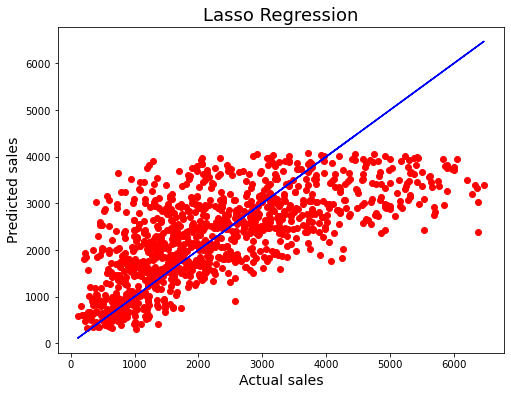

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [165]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [176]:
rd = Ridge(alpha=0.01, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x_t,y,cv=9)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 46.5338609994308
Cross Val Score: 46.26539691712341


In [167]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 745.3665725201953
Mean Squared Error: 978293.7693175961
Root Mean Square Error: 989.0873416021439


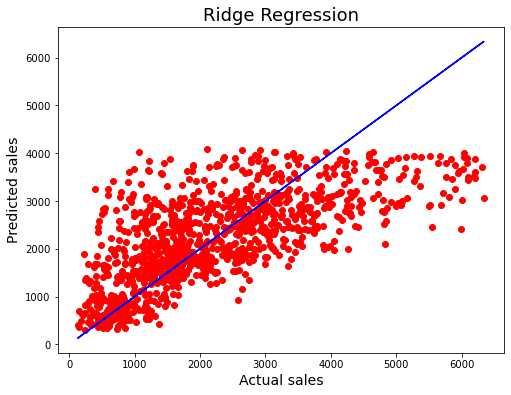

In [168]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Ensemble Techniques:

In [169]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [177]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='random')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x_t,y,cv=9)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: -19.742617766648074
Cross Val Score: -15.207915588952531


In [171]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 1046.5884634686347
Mean Squared Error: 1943489.7931248106
Root Mean Square Error: 1394.091027560543


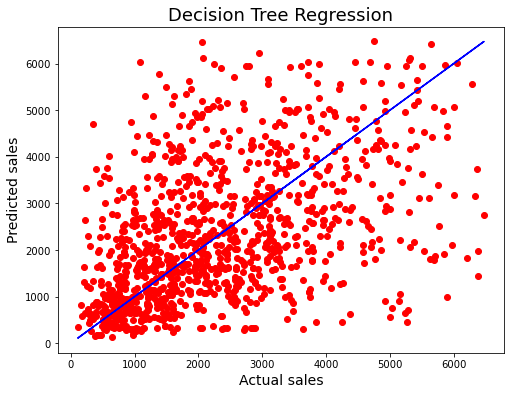

In [144]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [149]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'huber', 'n_estimators': 50}


In [178]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=50)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x_t,y,cv=9)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 46.39142405400896
Cross Val Score: 45.565617919608634


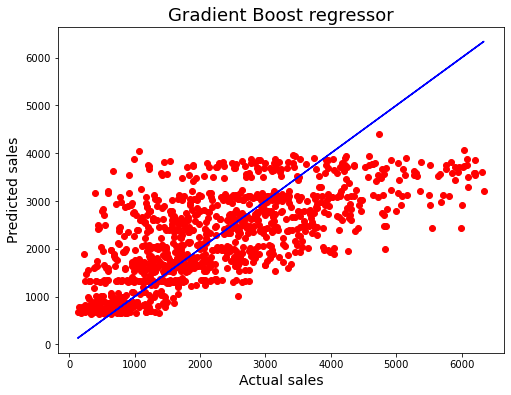

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [ ]:
#!pip install xgboost

In [151]:
import xgboost
print(xgboost.__version__)

1.4.2


In [196]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor






In [195]:
gb = XGBRegressor()
xgb.fit(x_train_b,y_train_b)
xgb = XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(xgb, x_t, y, scoring='neg_mean_absolute_error', cv=9, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: nan (nan)


In [194]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,x_t,y,cv=9)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)





R2 Score: 25.596255194892116
Cross Val Score: 26.27729470852975


In [181]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,x_t,y,cv=9)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)


KNR score: 0.7290820926687517
R2 Score: 15.875899762079836
Cross Val Score: 16.260373120864624


In [182]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 1539256.1469854792
Root Mean Squared error: 1240.6676214786453


In [183]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,x_t,y,cv=9)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)


SVR score: 0.027887722514175373
R2 Score: 4.216400245573004
Cross Val Score: 3.3559977805904335


In [187]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 2}


In [188]:

abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 2)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x_t,y,cv=9)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 45.4432294463823
Cross Val Score: 45.71521245864661


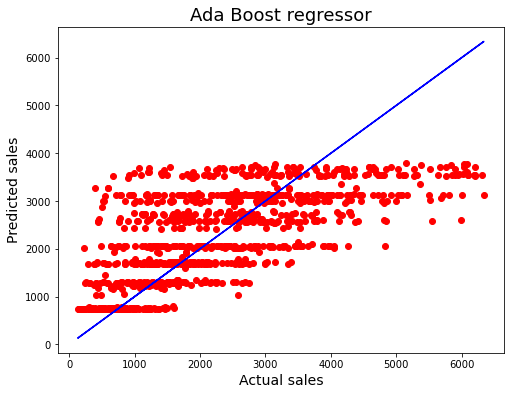

In [189]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [197]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'poly'}


In [198]:
sv = SVR(kernel = 'poly', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x_t,y,cv=3)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: -2.1695698126932506
Cross Val Score: -3.6016405971934637


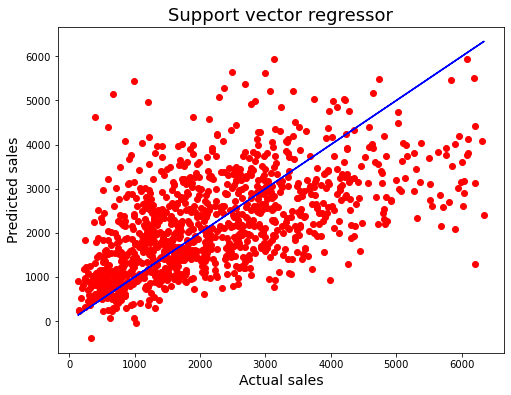

In [199]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sales',fontsize=14)
plt.ylabel('Predicted sales',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is Ridge regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving

In [200]:
import pickle
filename = 'in_advertising.pkl'
pickle.dump(rd,open(filename, 'wb'))

# Conclusion

In [211]:
a=np.array(y1)
a

array([[ 0.74290275,  1.58260005, -0.55335559, ..., -0.84993729,
        -1.28100793,  0.        ],
       [ 0.15545864, -1.19049422, -0.55335559, ...,  1.1476156 ,
         0.34036088,  0.        ],
       [-0.62659535, -0.56595964,  1.17583242, ...,  0.08642633,
        -1.28100793,  0.        ],
       ...,
       [ 1.31446938, -0.51891469, -0.55335559, ...,  1.1476156 ,
         0.34036088,  0.        ],
       [-0.49181241,  0.60331347,  1.17583242, ...,  1.1476156 ,
         0.34036088,  0.        ],
       [ 0.51709847, -0.63733167,  1.17583242, ...,  1.1476156 ,
         0.34036088,  0.        ]])

In [212]:
predicted=np.array(rd.predict(y1))
predicted

array([-1257.28763298,  1518.01396468,  -887.41014212, ...,
       -1045.25182279,  4883.79562969, -3343.04236377])

# From the above table the model is predicted the values with 46 percent accuracy